In [73]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
heart_data = pd.read_csv("../Data/heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
ages = pd.crosstab(index=heart_data['age'], columns='count')
ages

col_0,count
age,
29,1
34,2
35,4
37,2
38,3
39,4
40,3
41,10
42,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119bfc0b8>,
      dtype=object)

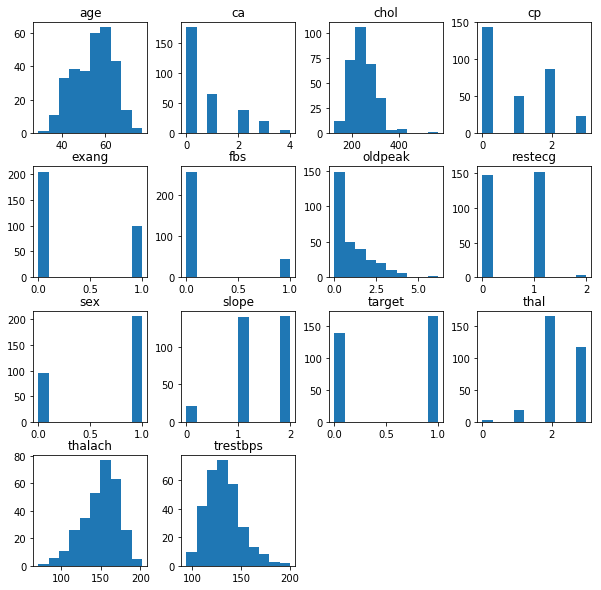

In [4]:
# There are 14 columns, so we will make 13 frequency tables.
heart_data.hist(grid=False,figsize=(10, 10))

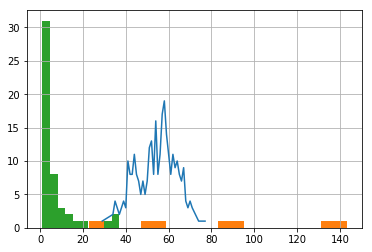

In [5]:
# The three to be used
heart_data['age'].value_counts(sort=False).plot()
heart_data['cp'].value_counts(sort=False).hist()
heart_data['trestbps'].value_counts(sort=False).hist()




Text(0, 0.5, 'Frequency')

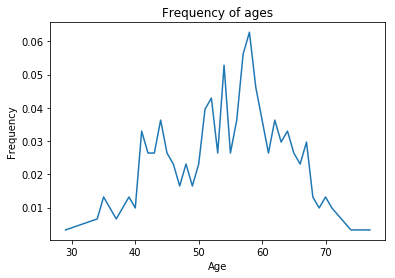

In [6]:
ages = heart_data['age'].value_counts(sort=False).values
age_freq = ages / ages.sum()

ranges = [i for i in heart_data['age'].value_counts(sort=False).index]

plt.plot(ranges, age_freq)
plt.title("Frequency of ages")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

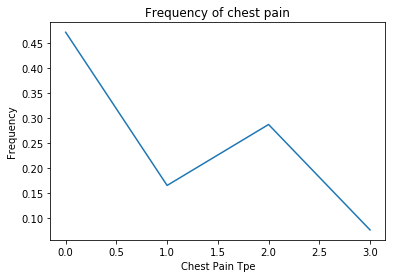

In [7]:
cp = heart_data['cp'].value_counts(sort=False).values
cp_freq = cp / cp.sum()

ranges = [i for i in heart_data['cp'].value_counts(sort=False).index]

plt.plot(ranges, cp_freq)
plt.title("Frequency of chest pain")
plt.xlabel("Chest Pain Tpe")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

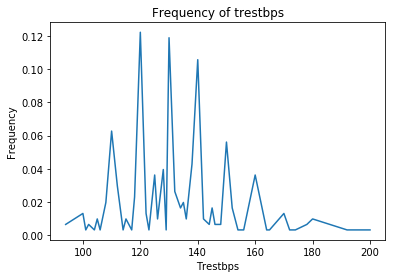

In [8]:
trestbps = heart_data['trestbps'].value_counts(sort=False).values
trestbps_freq = trestbps / trestbps.sum()

ranges = [i for i in heart_data['trestbps'].value_counts(sort=False).index]

plt.plot(ranges, trestbps_freq)
plt.title("Frequency of trestbps")
plt.xlabel("Trestbps")
plt.ylabel("Frequency")

In [9]:
# Now let's look at the cumulative graph

age_freq = [ sum(age_freq[0:i]) for i in range(len(age_freq))[::-1] ][::-1]
cp_freq = [ sum(age_freq[0:i]) for i in range(len(cp_freq))[::-1] ][::-1]
trestbps_freq = [ sum(age_freq[0:i]) for i in range(len(trestbps_freq))[::-1] ][::-1]


Text(0, 0.5, 'Cumulative Frequency')

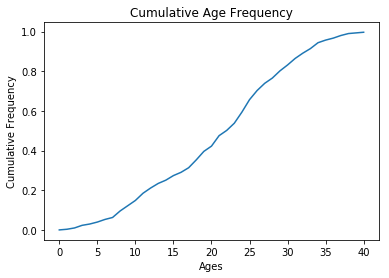

In [10]:

plt.plot(age_freq)
plt.title("Cumulative Age Frequency")
plt.xlabel("Ages")
plt.ylabel("Cumulative Frequency")


Text(0, 0.5, 'Cumulative Chest Pain')

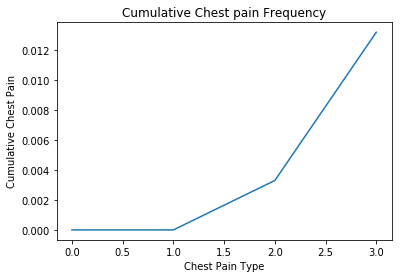

In [11]:

plt.plot(cp_freq)
plt.title("Cumulative Chest pain Frequency")
plt.xlabel("Chest Pain Type")
plt.ylabel("Cumulative Chest Pain")


Text(0, 0.5, 'Cumulative Frequency')

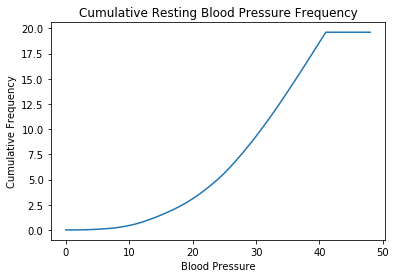

In [12]:

plt.plot(trestbps_freq)
plt.title("Cumulative Resting Blood Pressure Frequency")
plt.xlabel("Blood Pressure")
plt.ylabel("Cumulative Frequency")


In [13]:
# Resting blood pressure is approximately normal

In [14]:
heart_data['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [15]:
heart_data['cp'].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [16]:
heart_data['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

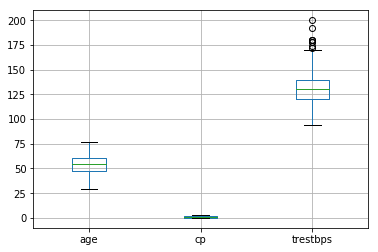

In [21]:
the_important = heart_data[['age','cp','trestbps']]
the_important.boxplot()

In [33]:
# Confidence
range_age = [41.5, 68.5]
range_trestbps = [110, 150]
print("\t:{}".format( the_important['age'].between(range_age[0], range_age[1]).sum() / the_important['age'].count()   ) )
print("\t:{}".format( the_important['trestbps'].between(range_trestbps[0], range_trestbps[1]).sum() / the_important['trestbps'].count()   ) )

	:0.8613861386138614
	:0.8217821782178217


In [36]:
range_age = [53.348, 55.392]
range_trestbps = [129.65, 133.600]
print("\t:{}".format( the_important['age'].between(range_age[0], range_age[1]).sum() / the_important['age'].count()   ) )
print("\t:{}".format( the_important['trestbps'].between(range_trestbps[0], range_trestbps[1]).sum() / the_important['trestbps'].count()   ) )

	:0.07920792079207921
	:0.14521452145214522


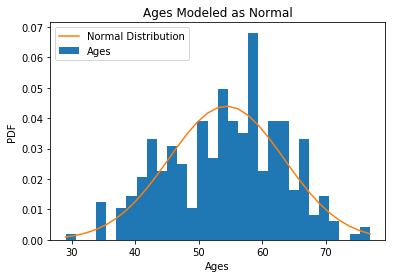

In [69]:
age_mean = heart_data['age'].mean()
age_std = heart_data['age'].std()
#dist = np.random.normal(age_mean, age_var, 40000)
dist = heart_data['age']

count, bins, ignored = plt.hist(dist, 30, normed=True)
plt.plot(bins, 1/(age_var * np.sqrt(2 * np.pi)) * np.exp( - (bins - age_mean)**2 / (2 * age_std**2) ))
plt.legend(["Normal Distribution","Ages"])
plt.title("Ages Modeled as Normal")
plt.xlabel("Ages")
plt.ylabel("PDF")
plt.show()

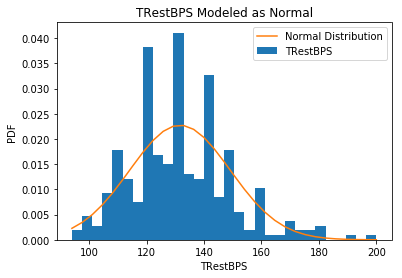

In [71]:
age_mean = heart_data['trestbps'].mean()
age_var = heart_data['trestbps'].std()
#dist = np.random.normal(age_mean, age_var, 40000)
dist = heart_data['trestbps']

count, bins, ignored = plt.hist(dist, 30, normed=True)
plt.plot(bins, 1/(age_var * np.sqrt(2 * np.pi)) * np.exp( - (bins - age_mean)**2 / (2 * age_var**2) ))
plt.legend(["Normal Distribution","TRestBPS"])
plt.title("TRestBPS Modeled as Normal")
plt.xlabel("TRestBPS")
plt.ylabel("PDF")
plt.show()

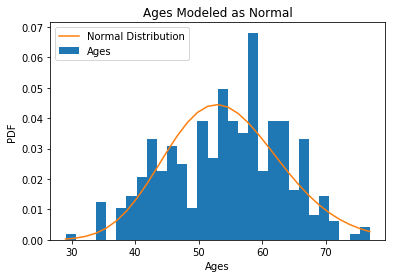

In [75]:
age_mean = heart_data['age'].mean()
age_var = heart_data['age'].var()

alpha = age_mean**2 / age_var
beta = age_var / age_mean
#dist = np.random.normal(age_mean, age_var, 40000)
dist = heart_data['age']

count, bins, ignored = plt.hist(dist, 30, normed=True)
plt.plot(bins, (1/(math.gamma(alpha) * beta**alpha)) * (bins)**(alpha-1) * np.exp(-bins/beta) )
plt.legend(["Normal Distribution","Ages"])
plt.title("Ages Modeled as Normal")
plt.xlabel("Ages")
plt.ylabel("PDF")
plt.show()

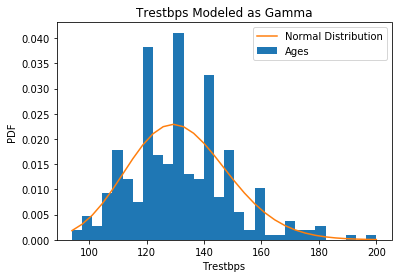

In [76]:
age_mean = heart_data['trestbps'].mean()
age_var = heart_data['trestbps'].var()

alpha = age_mean**2 / age_var
beta = age_var / age_mean
#dist = np.random.normal(age_mean, age_var, 40000)
dist = heart_data['trestbps']

count, bins, ignored = plt.hist(dist, 30, normed=True)
plt.plot(bins, (1/(math.gamma(alpha) * beta**alpha)) * (bins)**(alpha-1) * np.exp(-bins/beta) )
plt.legend(["Normal Distribution","Ages"])
plt.title("Trestbps Modeled as Gamma")
plt.xlabel("Trestbps")
plt.ylabel("PDF")
plt.show()